In [1]:
import pandas as pd
import os
import kagglehub

# Step 1: Download dataset
path = kagglehub.dataset_download("yasserh/titanic-dataset")

df = pd.read_csv(os.path.join(path,'Titanic-Dataset.csv' ))

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

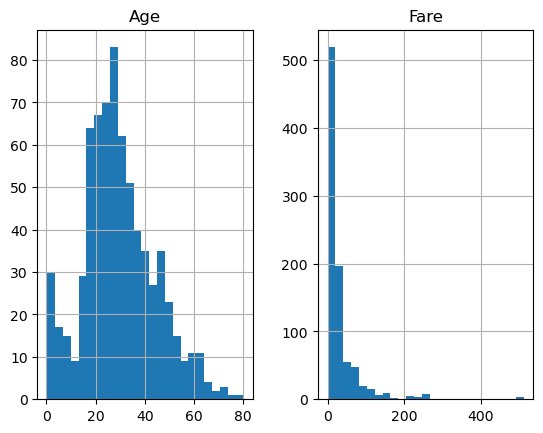

In [5]:
cols_numeric=["Age","Fare"]
df[cols_numeric].hist(bins=25)

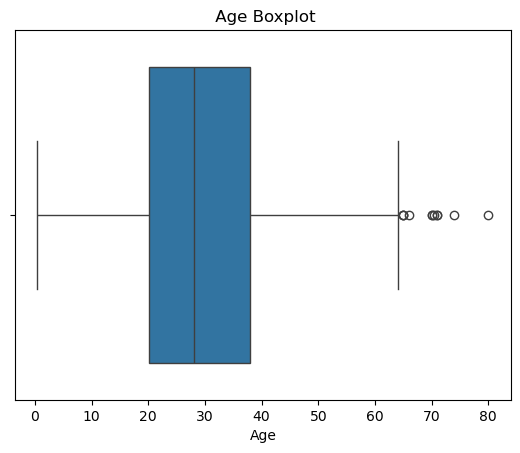

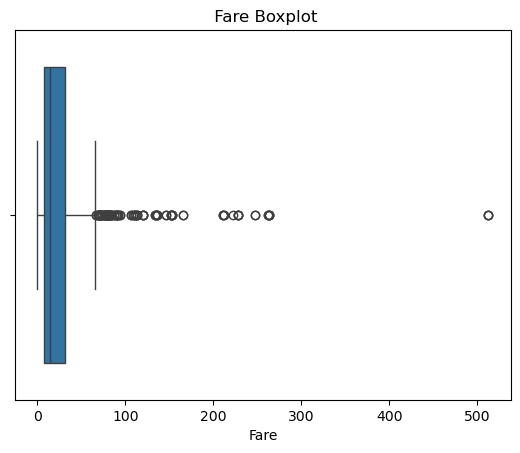

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in cols_numeric:
    sns.boxplot(df,x=col)
    plt.title(f" {col} Boxplot")
    plt.show()

<Axes: >

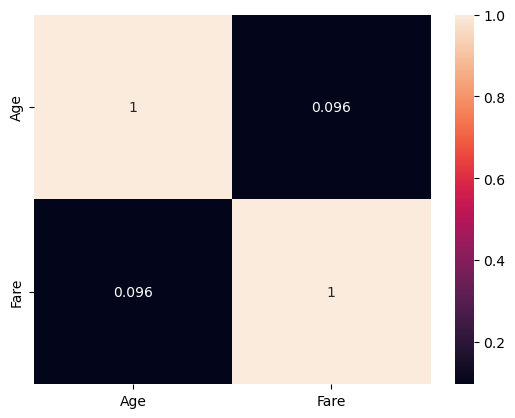

In [20]:

df1=pd.DataFrame(data=df[cols_numeric])
corr=df1.corr()
sns.heatmap(corr,annot=True)

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

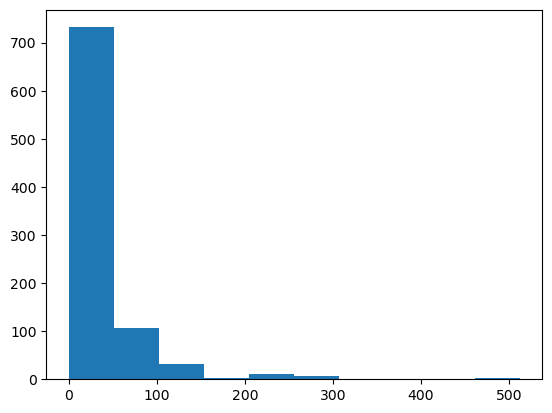

In [35]:
plt.hist(df['Fare'])

<Axes: xlabel='Pclass', ylabel='Fare'>

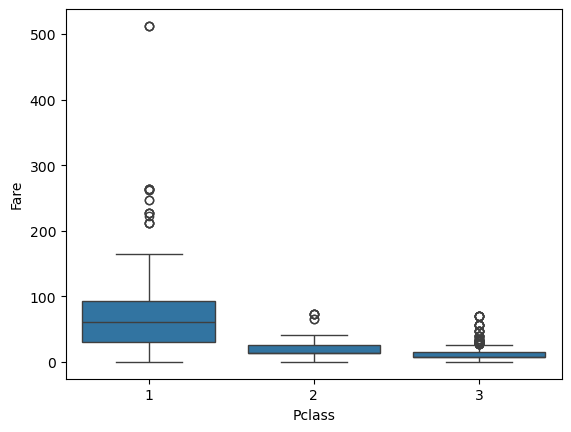

In [33]:
sns.boxplot(df,x='Pclass',y='Fare')

<Axes: xlabel='Sex', ylabel='count'>

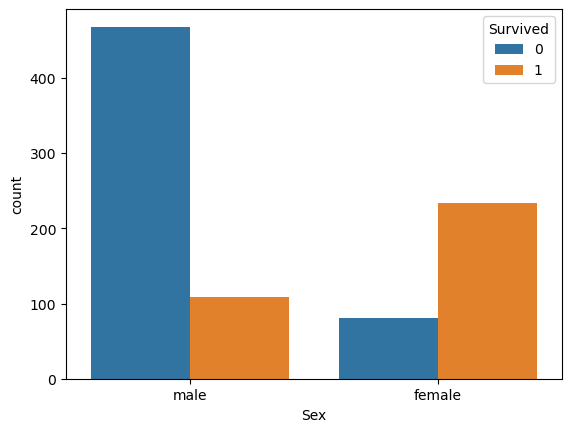

In [38]:
sns.countplot(df,x='Sex',hue='Survived')

<Axes: xlabel='Age', ylabel='Density'>

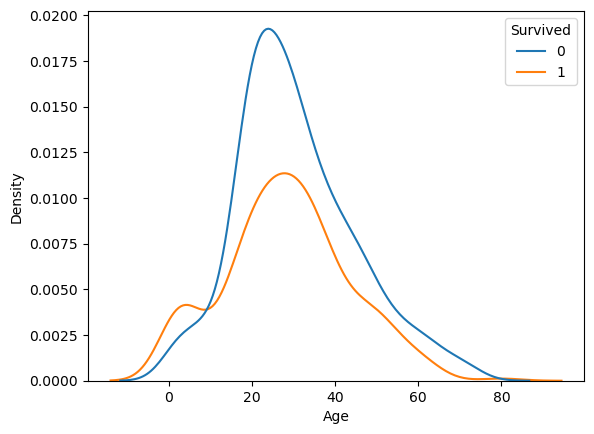

In [30]:
sns.kdeplot(df,x='Age',hue='Survived')

### Insights

Most values are concentrated below 50.

A long tail on the right — a few passengers paid very high fares (up to 500).

The distribution is right-skewed.


Feature-level Insight:

Majority of passengers traveled in lower fare classes (likely 3rd class).

Fare is highly imbalanced, suggesting a few wealthy passengers and many low-paying ones.

Useful Feature: It could strongly correlate with passenger class (Pclass) and survival.


Ages 20–30:

Both curves peak here — most passengers were in this age range.

More non-survivors than survivors, indicating survival was lower for young adults.

Children (0–10 years):

The orange line is higher than the blue line.

Suggests higher survival rate for young children.

Older Age (60+):

Very few passengers in this group overall.

Slightly more non-survivors, but not significant due to low counts.